# Introduction to Data Science

**Instructions**:

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Then you can safely delete the line

  `raise NotImplementedError()`

- Please fill out the cell below for **every submission**.
- Before you hand this problem, make sure everything runs as expected. You can use the `Validate` button directly above the cells or **restart the kernel and run all cells** by selecting `Kernel --> Restart Kernel and Run All Cells` in the menubar above.
- Don't forget to submit the file until the due date by clicking on `Nbgrader --> Assignment List` and then clicking on `Submit`.
- You can savely add new cells to make additional experiments, but please use the given cells to solve the problems and answer the tasks. Otherwise, the autograder might not be able to grade your answer appropriately and assign the correct number of points.

In [1]:
NAME = "Sebastain Schulz"
EMAIL = "sebastian.schulz@tu-chemnitz.de"
USERNAME = "schulzs"

---

## Lab 2: Data import and linear regression

This course assumes that you are comfortable with the basic functions of Jupyter and Python.

### Part A: Introduction Data Import

Download the file `Advertising.csv` from the homepage’s exercise section and move it to your current folder.
Take a short look at the `csv`-file using a spreadsheet, e.g., LibreOffice.
The file contains information about the sales of products in different markets, along with advertising budgets in the three media: **TV**, **radio** and **newspaper**.

**Task**: Import the `csv`-file using the `numpy` function `genfromtxt` and store it as an array `X`.

In [4]:
import numpy as np

X = np.genfromtxt('Advertising.csv', delimiter=',', usemask=True)

In [5]:
# This cell contains hidden tests. Don't remove it!

**Task**: Extract the columns from the array `X` and store them as 1-dimensional arrays `idx`, `tv`, `radio`, `newspaper` and `sales`, e.g.,
    
    idx = X[:, 0]

In [6]:
idx = X[:, 0]
tv = X[:, 1]
radio = X[:, 2]
newspaper = X[:, 3]
sales = X[:, 4]

In [7]:
# This cell contains hidden tests. Don't remove it!

**Task**: Add subplots to plot sales against radio as well as sales against newspaper.

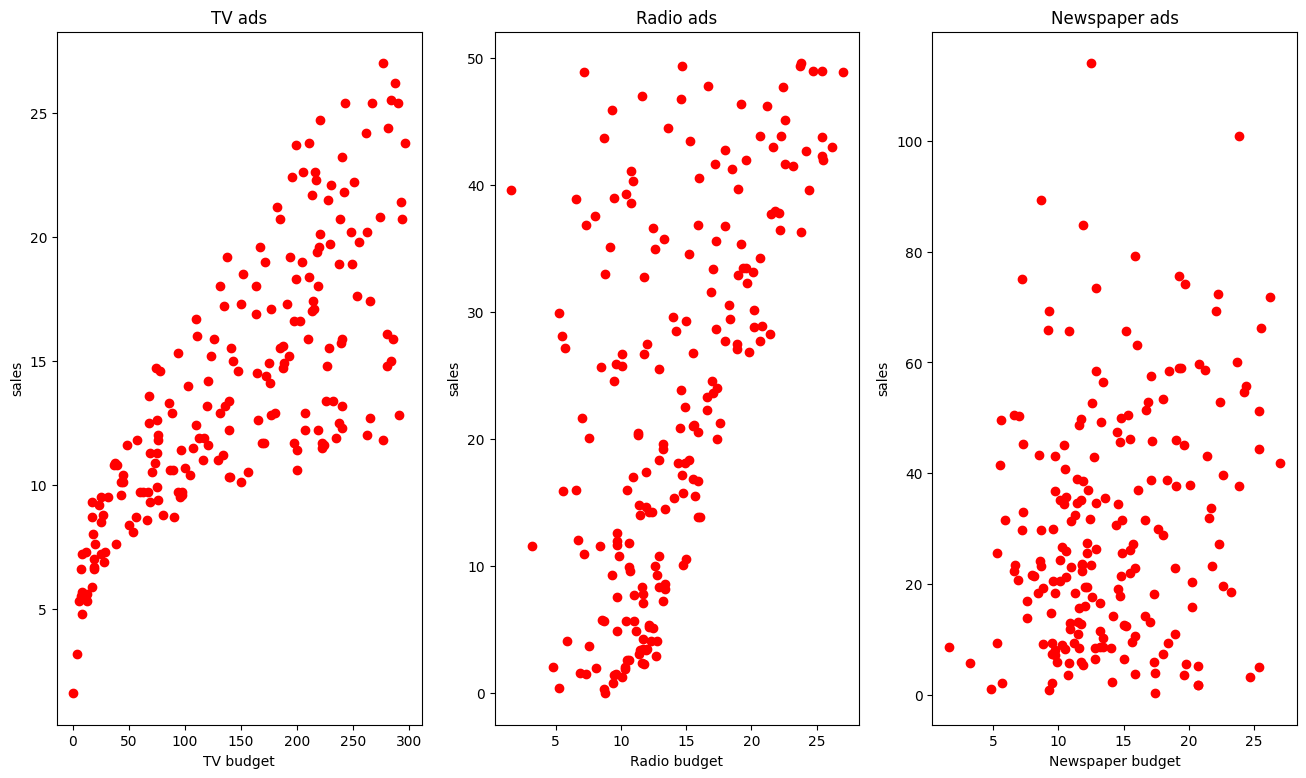

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
fig1 = plt.figure()
fig1.add_subplot(1,3,1)
plt.plot(tv, sales, 'ro')
plt.xlabel('TV budget')
plt.ylabel('sales')
plt.title('TV ads')

fig1.add_subplot(1,3,2)
plt.plot(sales, radio, 'ro')
plt.xlabel('Radio budget')
plt.ylabel('sales')
plt.title('Radio ads')

fig1.add_subplot(1,3,3)
plt.plot(sales, newspaper, 'ro')
plt.xlabel('Newspaper budget')
plt.ylabel('sales')
plt.title('Newspaper ads')

plt.show()

### Part B: Creation of a function in Python
The mean squared errer, short **MSE**, is one of the most important performance indicators for the quality of data fitting.
The goal of this exercise is to implement the function `computeMSE` with the following **input**:
- the observations $y_i \in Y$, $i = 1, \ldots, N$ that belong to measurements $x_i \in X$, $i = 1, \ldots, N$
- the predictions of $f(x_i)$, which are denoted by $\hat f(x_i)$, $i = 1, \ldots, N$

and corresponding **output**:

$$
    MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat f (x_i))^2
$$

In [18]:
import numpy as np

# Define function for mean squared error
def computeMSE(y, fhatx):
    return np.square(y - fhatx).mean()

In [44]:
x = np.array([0.55, 0.72, 0.6 , 0.54, 0.42,
    0.65, 0.44, 0.89, 0.96, 0.38,
    0.79, 0.53, 0.57, 0.93, 0.07,
    0.09, 0.02, 0.83, 0.78, 0.87])

y = np.array([6.9 , 7.58, 7.03, 6.61, 5.84,
    7.32, 6.29, 8.38, 9.03, 5.75,
    7.95, 6.63, 7.  , 8.8 , 4.37,
    4.49, 4.01, 7.95, 7.87, 8.37])

fhatx = np.array([
       6.74792024, 7.61454115, 7.00280875, 6.69694254, 6.08521014,
       7.25769725, 6.18716554, 8.48116205, 8.83800595, 5.88129934,
       7.97138505, 6.64596484, 6.84987564, 8.68507285, 4.30099064,
       4.40294604, 4.04610214, 8.17529585, 7.92040735, 8.37920665])

print('MSE: ', computeMSE(y, fhatx))



MSE:  0.01375124894963537


**Task**: Compute the linear regression coefficients $\beta_0, \beta_1 \in \mathbb{R}$ with the `numpy` module `Polynomial` which can be imported by

    from numpy.polynomial import Polynomial.

Use the function `Polynomial.fit` to create a fitted polynomial object `p`.
Store the computed/learned regression coefficients in a variable `beta`.
Note that the polynomial stores the coefficients in a different basis and you have to call the method `convert` in order to get the coefficients in the convenient format
$$
f(x) = \beta_0 + \beta_1 x.
$$

Remember, linear regression finds the values $\beta_0, \beta_1 \in \mathbb{R}$ which solve the minimization problem

$$
\text{Minimize } \frac{1}{N} \sum_{i=1}^N \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2 \text{ over } \beta_0, \beta_1 \in \mathbb{R}
$$

*Hint*: Again, use the question mark `?` to get help and have a look at the documentation.

In [52]:
from numpy.polynomial import Polynomial

fhat = Polynomial.fit(x, y, 1)
betas = fhat.convert().coef

In [53]:
# This cell contains hidden tests. Don't remove it!

**Task**: Compute the prediction $\hat f(x)$ of the linear model by yourself and store it in a variable `z`.
The values should coincide with those of the variable `fhatx` (by at most `1e-8`). You can use the polynomial which was returned by calling `Polynomial.fit()`.

In [70]:
z = fhat(x)
assert(np.argwhere((z - fhatx) > 1e-8).size == 0)

In [48]:
# This cell contains hidden tests. Don't remove it!

**Task**: Plot the data points $(x_i, y_i)$, $i = 1 \ldots, N$ together with the least squares line aka regression line.

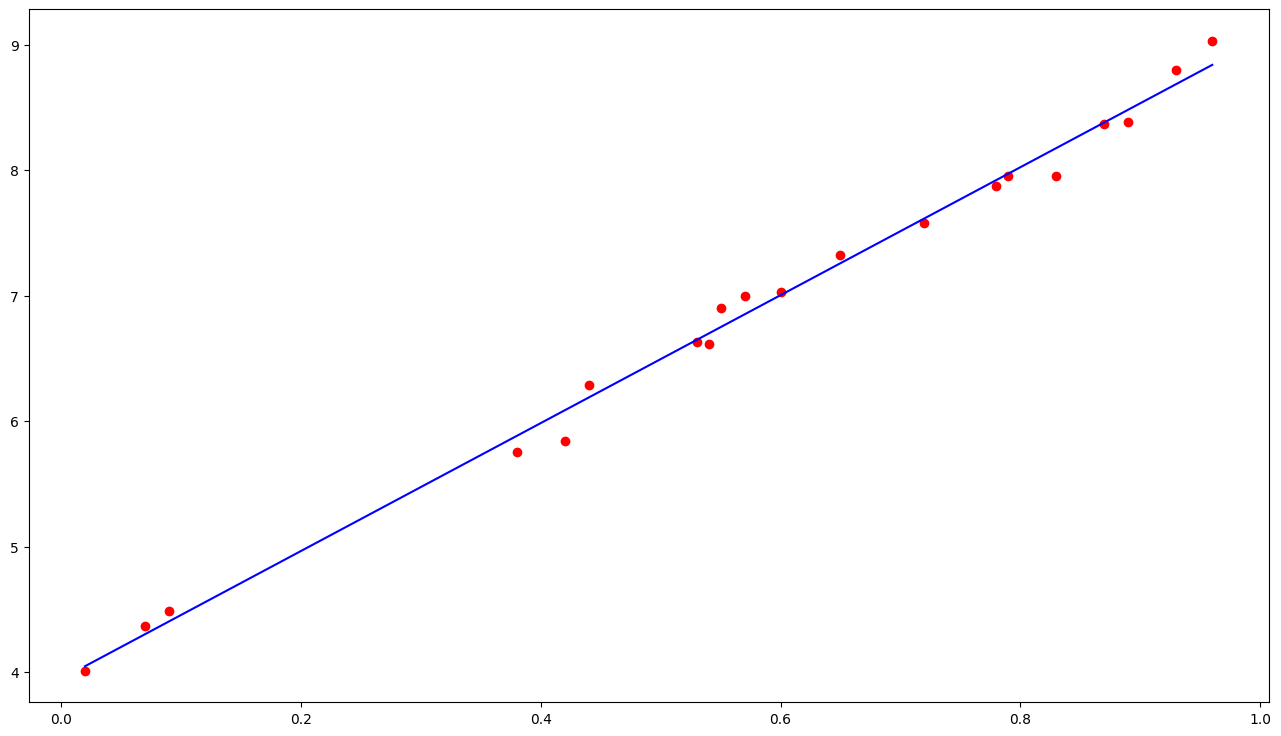

In [88]:
# YOUR CODE HERE
plt.plot(x, y, color='red', marker='o', linestyle='None')
x_sorted = np.sort(x)
plt.plot(x_sorted, fhat(x_sorted), color='blue')

### Part C: Introduction Pandas
In **Part A**, you got to know a method to import `csv`-files using the function `np.genfromtxt`.
At one point or another, we would have to deal with a problem
that is inherent to numpy-arrays, namely that numpy-arrays can only handle one data type at a time.
If we have different kinds of data like booleans, floats, integers or
strings, we have to take a different route.
One possible solution lies in the usage of the package `csv`.
Here, every single row is scanned seperately, and thus can be handled to catch special cases.
Another possibility is to use the package `pandas`, whose complexity is between the other two. It can be imported by

    import pandas as pd

and `csv`-files can be imported by the function `pd.read_csv`.

**Task**: Work through the [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/10min.html#min) (this is a link!).

**Task**: Download the file `Auto.csv` from the lecture’s homepage. Import the `csv`-file using the pandas function `read_csv` as a `DataFrame` named `Auto`.
Beware of the missing values in the `csv`-file.
You can use the optional parameter `na_values` from the function `read_csv`.
In this problem, we want to **remove those data sets** that contain missing values.
You should use the method `dropna` with appropriate parameters for this purpose.
You can use `print(Auto.isna().sum())` to check for missing values in your dataset.

In [153]:
import pandas as pd

Auto = pd.read_csv('Auto.csv', na_values='?')
print(Auto.isna().sum())
Auto = Auto.dropna()
print(Auto.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [154]:
# This cell contains hidden tests. Don't remove it!

**Task**: Create a short summary of the most important statistics of the data set using the method `describe`.

In [157]:
# YOUR CODE HERE
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Task**: Create a graphical overview of the distributions of the input variables of the data set using the method `hist`.

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

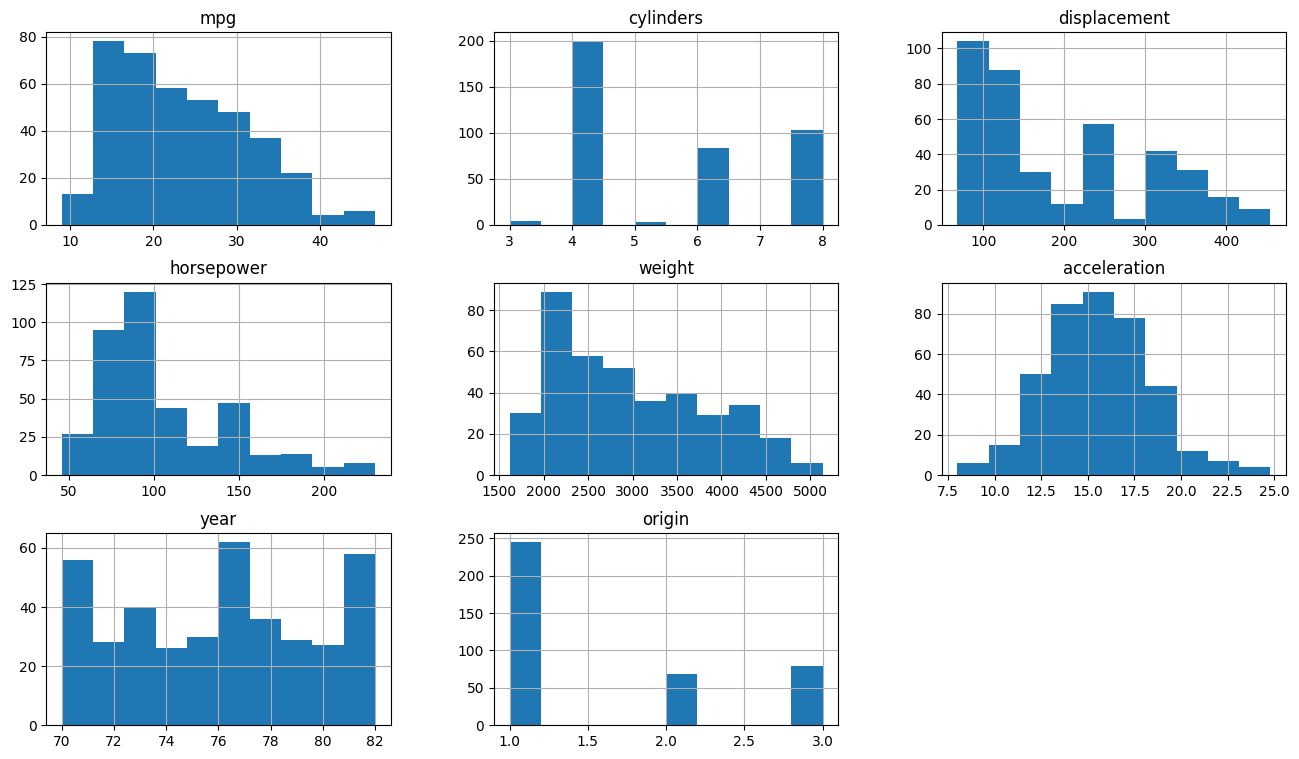

In [158]:
# YOUR CODE HERE
Auto.hist()

**Task**: Create a scatter matrix using the function `pd.plotting.scatter_matrix` for the variables `["horsepower", "mpg", "weight"]`.

array([[<Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>],
       [<Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>],
       [<Axes: xlabel='horsepower', ylabel='weight'>,
        <Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>]], dtype=object)

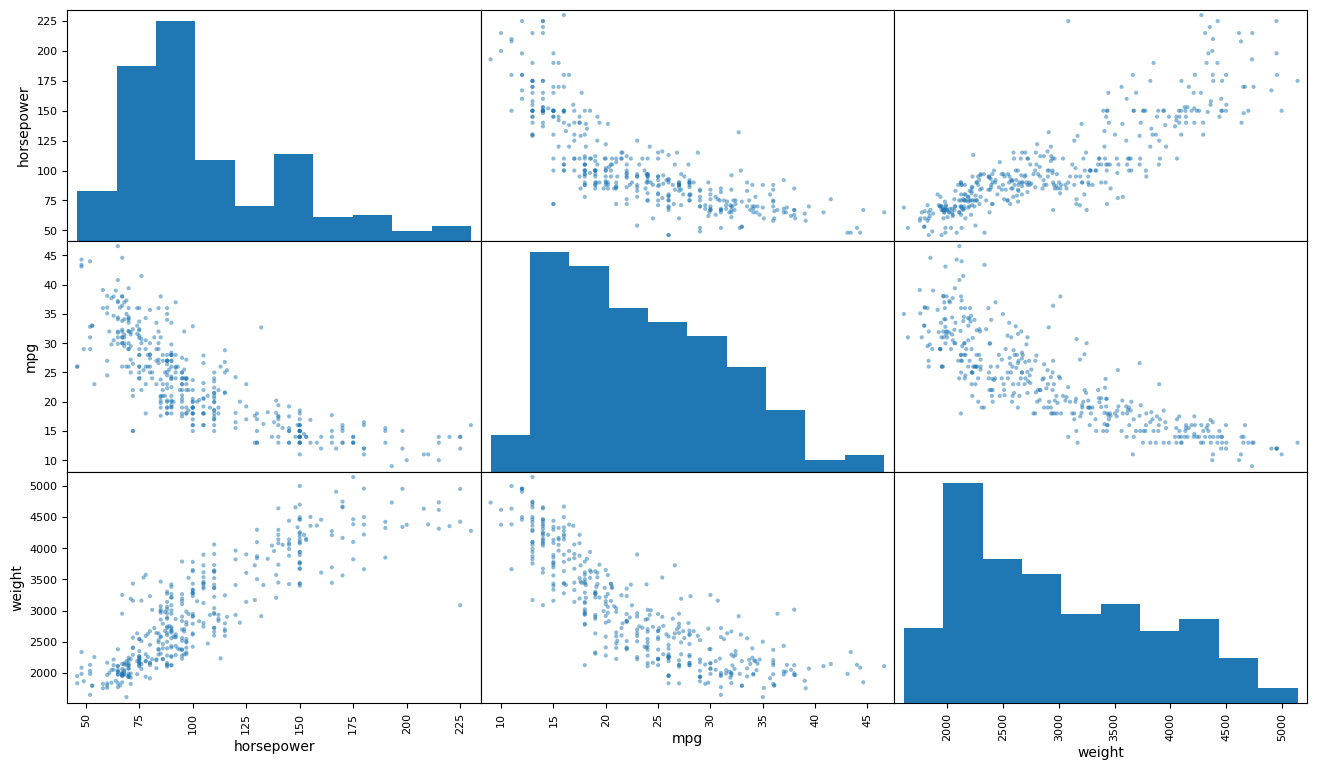

In [159]:
# YOUR CODE HERE
pd.plotting.scatter_matrix(Auto[['horsepower', 'mpg', 'weight']])

The following code cell investigates a linear or quadratic connection between horsepower and mpg (miles per gallon).

Investigating mpg against horsepower
MSE for linear fit:  23.943662938603108
MSE for quadratic fit:  18.98476890761722


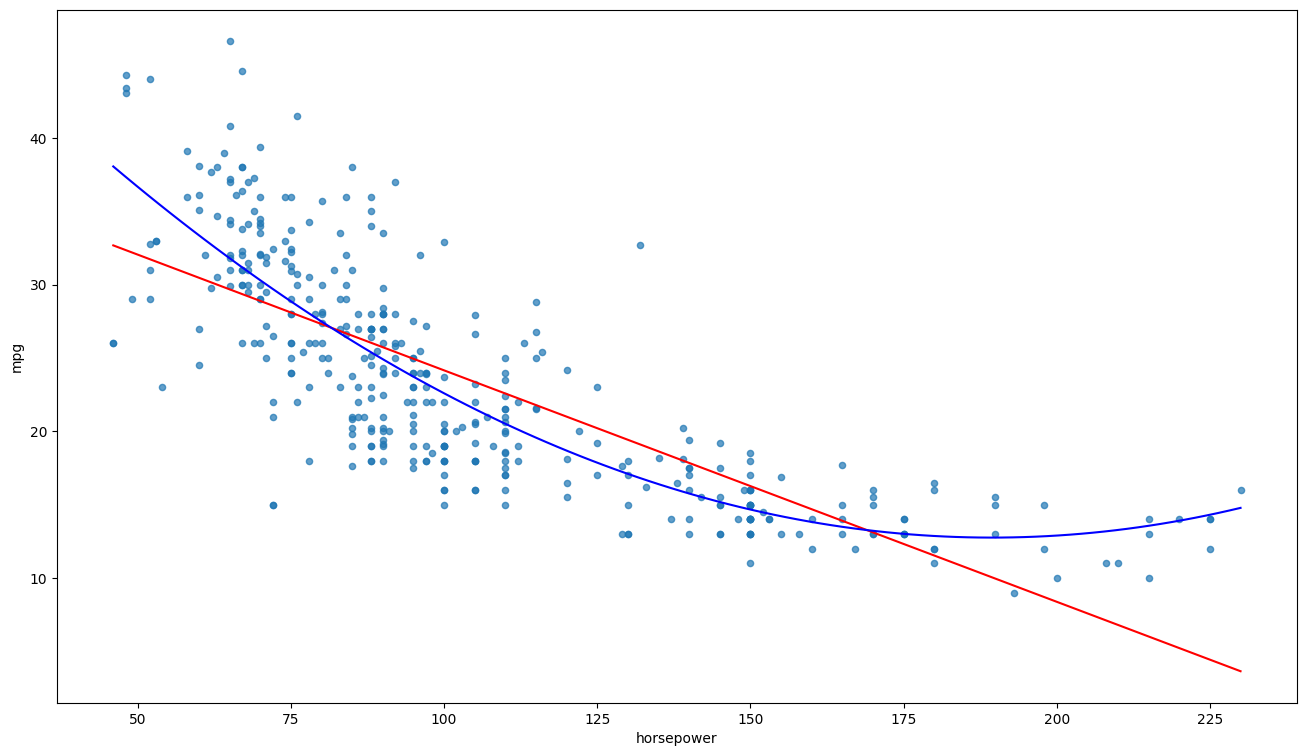

In [160]:
# Investigate linear and quadratic connection between horsepower and mpg
x = Auto.horsepower
y = Auto.mpg

mpg_model_1 = Polynomial.fit(x, y, deg=1)
mpg_model_2 = Polynomial.fit(x, y, deg=2)

Auto.plot(x='horsepower', y = 'mpg', marker='o', alpha = .7, kind='scatter')
xr = np.linspace(Auto.horsepower.min(), Auto.horsepower.max(), 100)
plt.plot(xr, mpg_model_1(xr), c='r')
plt.plot(xr, mpg_model_2(xr), c='b')

print('Investigating mpg against horsepower')
print('MSE for linear fit: ', computeMSE(y, mpg_model_1(x)))
print('MSE for quadratic fit: ', computeMSE(y, mpg_model_2(x)))


**Task**: Use the example from above and investigate a possible linear and quadratic relationship between horsepower and weight.

Investigating weight against horsepower
MSE for linear fit:  181763.7708797769
MSE for quadratic fit:  157432.36544399473


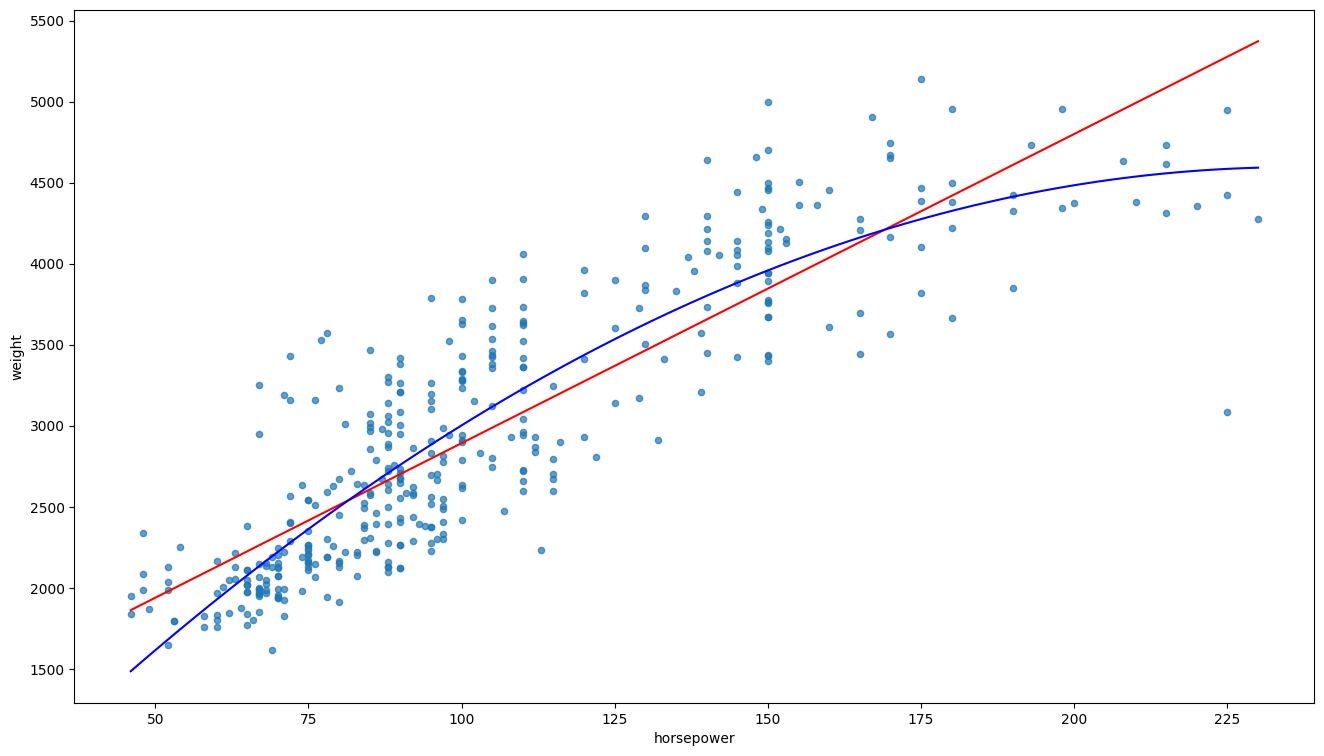

In [161]:
x = Auto.horsepower
y = Auto.weight

weight_model_1 = Polynomial.fit(x, y, deg=1)
weight_model_2 = Polynomial.fit(x, y, deg=2)

Auto.plot(x='horsepower', y = 'weight', marker='o', alpha = .7, kind='scatter')
xr = np.linspace(Auto.horsepower.min(), Auto.horsepower.max(), 100)
plt.plot(xr, weight_model_1(xr), c='r')
plt.plot(xr, weight_model_2(xr), c='b')

print('Investigating weight against horsepower')
print('MSE for linear fit: ', computeMSE(y, weight_model_1(x)))
print('MSE for quadratic fit: ', computeMSE(y, weight_model_2(x)))

### OPTIONAL TASK

In this task, we want to study best fitting polynomial models on behalf of a dataset that we will generate first.
We want to compute the mean squared errors for randomly selected training and test data.
Later, we will check the behavior of the MSE and infer which models under- and overfit the data.

In the following cell we will generate data.
We want also that there is some error in the data which we don't want our polynomial to fit.
The data `ydata` for the given corresponding `xdata` should be generated by the function: 
$$
y_{data}(x) = x^5-\frac{1}{2}x^2+1 + \varepsilon
$$
We model the error as the uniformly distributed random variable $\varepsilon$ on $[-\frac{1}{5},\frac{1}{5})$.
Of course $\varepsilon$ should be different for each $x$ and independent.

**Task**: Define `ydata` for the given $x$-values as stated above.
Note that you can rely solely on `numpy` function here, in particular for $\varepsilon$.

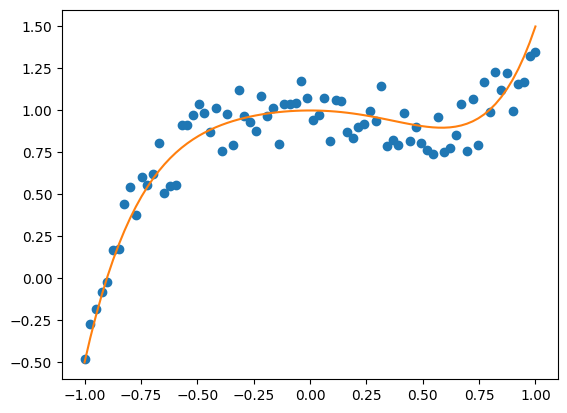

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# number of data points
n = 80

xdata = np.linspace(-1,1,n)
ydata = xdata**5 - 0.5 * xdata**2 + 1 + np.random.uniform(-1/5, 1/5, size=(xdata.size))
ydata_gt = xdata**5 - 0.5 * xdata**2 + 1

plt.plot(xdata, ydata, label='ydata', marker='o', linestyle='None')
plt.plot(xdata, ydata_gt, label='gt')

Our next step is to split the data into $m$ training points and $n-m$ test points randomly.

**Task**: Create an array `shuffle` with entries $0,\dots, n-1$ (we interprete these as the indices for train and test data).
Then apply the `numpy.random.shuffle` method on this.
Define `trainindices` as the first $m$ entries and the `testindices` as the remaining entries of `shuffle`.

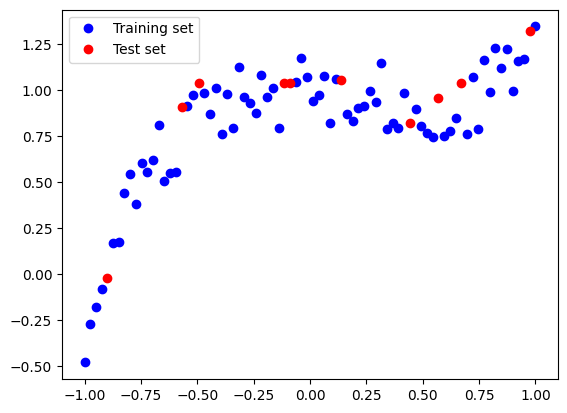

In [13]:
# data points which are used for modelling/training (the others for testing)
m = 70

shuffle = np.arange(n)
np.random.shuffle(shuffle)
trainindices = shuffle[:m]
testindices = shuffle[m:]

xtrain = xdata[trainindices]
ytrain = ydata[trainindices]
xtest = xdata[testindices]
ytest = ydata[testindices]

# Plotting train (blue) and test data (red)
plt.plot(xtrain, ytrain,'bo',xtest, ytest,'ro')
plt.legend(['Training set', 'Test set'])
plt.show()

Now we want to calculate all the MSEs for the best fitting poynomials for each degree from 0 up to $d\leq m$.

**Task**: Calculate for each degree 0 up to degree $d$ the best fitting polynomial and it's MSE and store the result in the `MSEtrain` and `MSEtest` arrays.

The final lines of the next cell will plot the MSE for each degree of the best fitting polynomial in logarithmic scale. 

In [ ]:
# max degree we will check
d = 20

d_range = np.arange(d)
MSEtrain = np.zeros(d)
MSEtest = np.zeros(d)

# YOUR CODE HERE
raise NotImplementedError()

plt.semilogy(d_range, MSEtrain, 'rx', label='training MSE')
plt.semilogy(d_range, MSEtest, 'bo', label='training MSE')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.title('MSE of best fitting polynomial of degree')

plt.show()